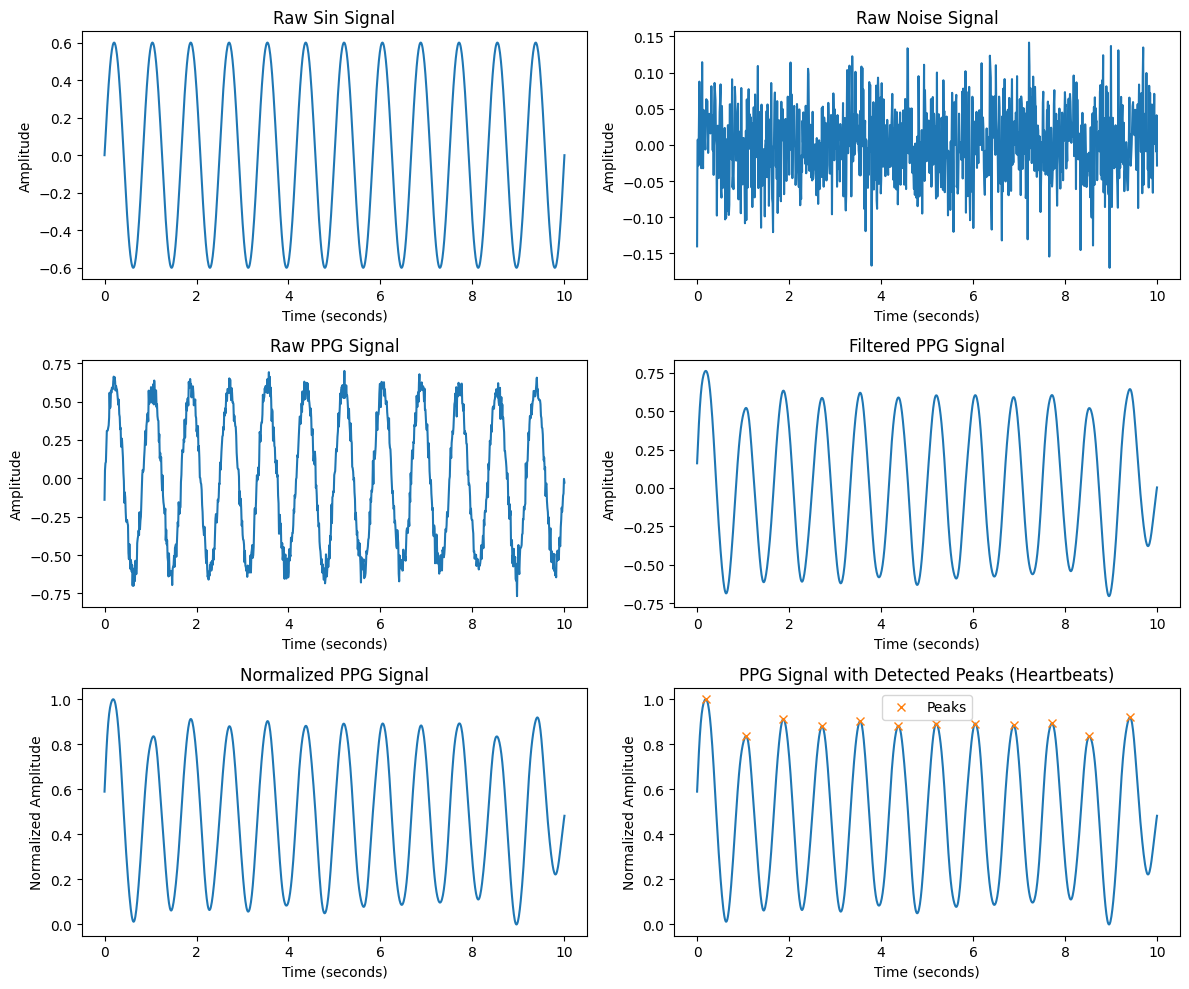

Heart Rate:  71.70343857846218  BPM


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Signal parameters
fs = 100
t = np.linspace(0, 10, fs * 10)

# Generate signals
sin_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t)

# Plotting
plt.figure(figsize=(12, 10))

# Subplot 1: Raw Sin Signal
plt.subplot(3, 2, 1)
plt.plot(t, sin_signal)
plt.title("Raw Sin Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

noise_signal = np.random.normal(0, 0.05, len(t))

# Subplot 2: Raw Noise Signal
plt.subplot(3, 2, 2)
plt.plot(t, noise_signal)
plt.title("Raw Noise Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

ppg_signal = sin_signal + noise_signal

# Subplot 3: Raw PPG Signal
plt.subplot(3, 2, 3)
plt.plot(t, ppg_signal)
plt.title("Raw PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")


# Bandpass filter function
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filter and normalize PPG signal

filtered_ppg = bandpass_filter(ppg_signal, 0.5, 5, fs)

# Subplot 4: Filtered PPG Signal
plt.subplot(3, 2, 4)
plt.plot(t, filtered_ppg)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

normalized_ppg = (filtered_ppg - np.min(filtered_ppg)) / (np.max(filtered_ppg) - np.min(filtered_ppg))

# Subplot 5: Normalized PPG Signal
plt.subplot(3, 2, 5)
plt.plot(t, normalized_ppg)
plt.title("Normalized PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")

# Detect peaks in the PPG signal
peaks, _ = find_peaks(normalized_ppg, distance=fs * 0.6)
ibi = np.diff(peaks) / fs  # Inter-beat interval in seconds
heart_rate = 60 / ibi  # Heart rate in BPM

# Subplot 6: PPG Signal with Detected Peaks
plt.subplot(3, 2, 6)
plt.plot(t, normalized_ppg)
plt.plot(t[peaks], normalized_ppg[peaks], "x", label="Peaks")
plt.title("PPG Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

# Print Heart Rate
print("Heart Rate: ", np.mean(heart_rate), " BPM")
